In [7]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fruit_df = pd.read_csv('fruitdata.csv')
fruit_df.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

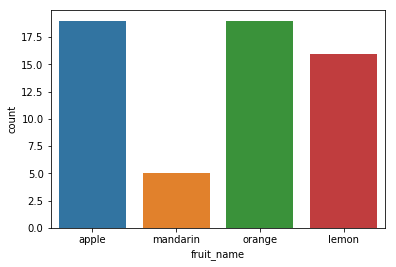

In [8]:
sns.countplot(fruit_df['fruit_name'], label='Count')

In [10]:
fruit_df.drop('fruit_label', axis = 1).plot(kind = 'box', subplots = True,
            layout = (2, 2), sharex = False, sharey = False, figsize = (9, 9),
            title = 'Box Plot for each input variable')

mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

In [12]:
import pylab as pl

fruit_df.drop('fruit_label', axis = 1).hist(bins = 30, figsize = (9, 9))
pl.suptitle("Histogram for each numeric input variable")

Text(0.5,0.98,u'Histogram for each numeric input variable')

Text(0.5,0.98,u'Scatter-matrix for each input variable')

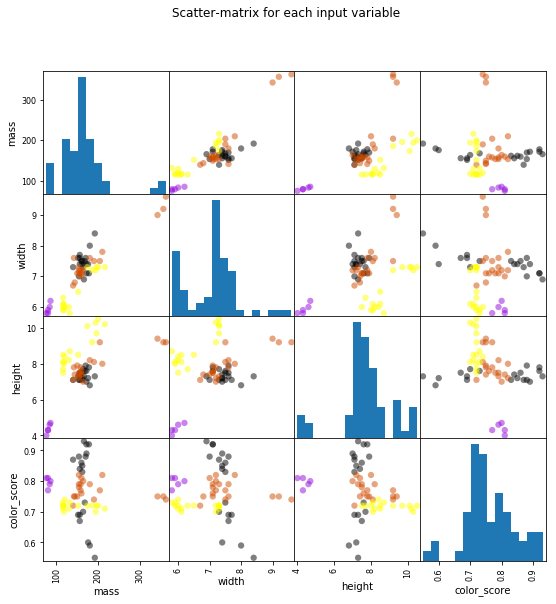

In [16]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruit_df[feature_names]
y = fruit_df['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, 
                hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')

In [17]:
fruit_df.describe()

fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000

# Lets run some classifiers!

First lets split up the data into training and test samples and scale data in either groups

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

__Logistic regression__

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


__Decision Tree__

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: %6.2f'
     % (clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: %6.2f'
     % (clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set:   1.00
Accuracy of Decision Tree classifier on test set:   0.67


__K-Nearest Neighbor__

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: %6.2f'
     % (knn.score(X_train, y_train)))
print('Accuracy pf K-NN classifier on test set: %6.2f'
     % (knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set:   0.95
Accuracy pf K-NN classifier on test set:   1.00


__Linear Discriminant Analysis__

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: %6.2f'
     % (lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: %6.2f'
     % (lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set:   0.86
Accuracy of LDA classifier on test set:   0.67
